In [ ]:
import pandas as pd
import seaborn as sns

In [30]:
df = pd.read_csv('data/young_survey.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school


### 기본정보 파악하기

In [6]:
basic_info = df.loc[:,'Age':'Education']
basic_info

,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,20.0,176.0,67.0,2.0,female,right,high school
3,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...
992,20.0,164.0,57.0,1.0,female,right,high school
993,27.0,183.0,80.0,5.0,male,left,master's degree
994,18.0,173.0,75.0,0.0,female,right,high school
995,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [7]:
basic_info.describe()

,Age,Height,Weight,Number of siblings
count,997.000000,982.000000,981.000000,995.000000
mean,20.439318,173.610998,66.407747,1.300503
std,2.835443,9.373842,13.862403,1.015548
min,15.000000,148.000000,41.000000,0.000000
25%,19.000000,167.000000,55.000000,1.000000
50%,20.000000,173.000000,64.000000,1.000000
75%,22.000000,180.000000,75.000000,2.000000
max,30.000000,203.000000,165.000000,10.000000


In [8]:
basic_info['Gender'].value_counts()

female    587
male      405
Name: Gender, dtype: int64

In [10]:
basic_info['Handedness'].value_counts()

right    895
left      99
Name: Handedness, dtype: int64

In [11]:
basic_info['Education'].value_counts()

high school          618
bachelor's degree    207
master's degree       78
middle school         78
elementary school     10
doctorate degree       5
Name: Education, dtype: int64

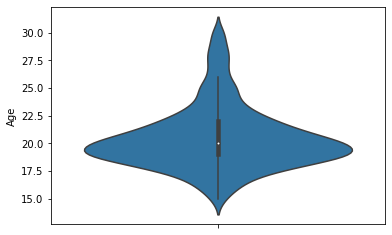

In [12]:
sns.violinplot(data=basic_info, y='Age')

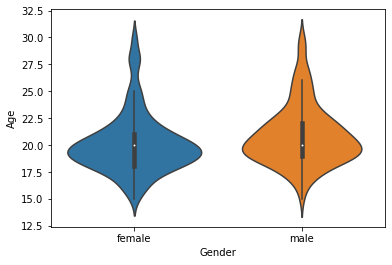

In [14]:
sns.violinplot(data=basic_info, x='Gender',y='Age')

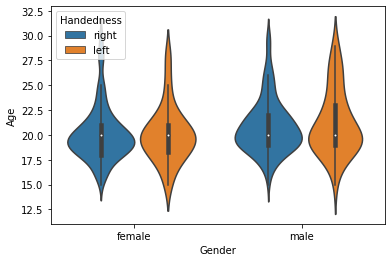

In [15]:
sns.violinplot(data=basic_info, x='Gender', y='Age', hue='Handedness')

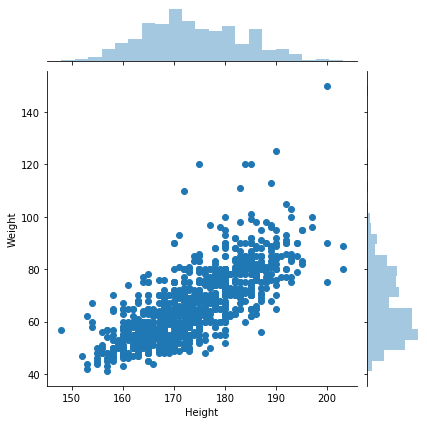

In [16]:
sns.jointplot(data=basic_info,x='Height',y='Weight')

### 상관관계 분석

In [31]:
music = df.iloc[:,:19]
music.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0


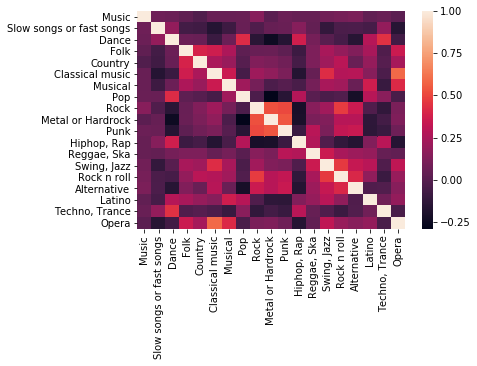

In [32]:
sns.heatmap(music.corr())

In [58]:
brunch = df.corr()['Getting up']

In [59]:
brunch[1:19]

Slow songs or fast songs   -0.052613
Dance                       0.027249
Folk                       -0.049612
Country                    -0.025315
Classical music             0.014285
Musical                     0.011869
Pop                         0.079101
Rock                        0.105245
Metal or Hardrock          -0.026769
Punk                       -0.029189
Hiphop, Rap                 0.038980
Reggae, Ska                -0.008434
Swing, Jazz                 0.019556
Rock n roll                 0.028889
Alternative                 0.027540
Latino                     -0.015060
Techno, Trance              0.019863
Opera                      -0.071819
Name: Getting up, dtype: float64

In [62]:
brunch[1:19].sort_values(ascending=True)

Opera                      -0.071819
Slow songs or fast songs   -0.052613
Folk                       -0.049612
Punk                       -0.029189
Metal or Hardrock          -0.026769
Country                    -0.025315
Latino                     -0.015060
Reggae, Ska                -0.008434
Musical                     0.011869
Classical music             0.014285
Swing, Jazz                 0.019556
Techno, Trance              0.019863
Dance                       0.027249
Alternative                 0.027540
Rock n roll                 0.028889
Hiphop, Rap                 0.038980
Pop                         0.079101
Rock                        0.105245
Name: Getting up, dtype: float64

In [66]:
settings = df[['Branded clothing','Healthy eating','Musical instruments','New environment','Prioritising workload','Spending on looks','Workaholism','Writing','Writing notes']]

In [67]:
settings

,Branded clothing,Healthy eating,Musical instruments,New environment,Prioritising workload,Spending on looks,Workaholism,Writing,Writing notes
0,5.0,4.0,3.0,4.0,2.0,3.0,4.0,2.0,5.0
1,1.0,3.0,1.0,4.0,2.0,2.0,5.0,1.0,4.0
2,1.0,3.0,5.0,3.0,2.0,3.0,3.0,5.0,5.0
3,3.0,3.0,1.0,1.0,4.0,4.0,5.0,3.0,4.0
4,4.0,4.0,3.0,4.0,1.0,3.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
992,4.0,3.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0
993,1.0,3.0,5.0,5.0,3.0,1.0,5.0,NaN,1.0
994,5.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0
995,1.0,3.0,1.0,4.0,1.0,3.0,1.0,4.0,5.0


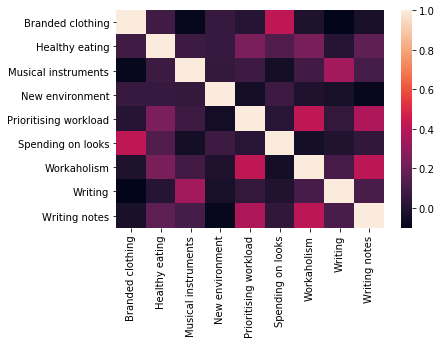

In [68]:
sns.heatmap(settings.corr())